In [1]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

# 1 데이터준비

In [37]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [38]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

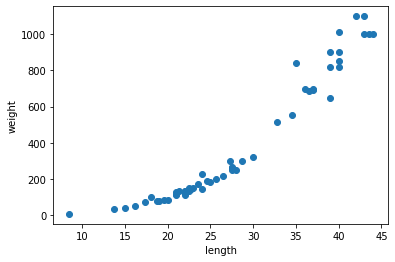

In [39]:
plt.scatter(perch_length,perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(perch_length,perch_weight,random_state=42)

In [41]:
print(X_train.shape,X_test.shape)

(42,) (14,)


In [42]:
test_array=np.array([1,2,3,4])
print(test_array.shape)
print(test_array)

(4,)
[1 2 3 4]


In [43]:
test_array=test_array.reshape(-1,1)
print(test_array.shape)
print(test_array)

(4, 1)
[[1]
 [2]
 [3]
 [4]]


In [45]:
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
print(X_train.shape,X_test.shape)

(42, 1) (14, 1)


# 2 결정계수($R^2$)

In [46]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
knr=KNeighborsRegressor()

In [47]:
# k-최근접 이웃 회귀모델을 학습합니다.
knr.fit(X_train,Y_train)

KNeighborsRegressor()

In [48]:
X_test.shape

(14, 1)

In [49]:
Y_test.shape

(14,)

In [50]:
knr.score(X_test,Y_test)

0.992809406101064

In [51]:
from sklearn.metrics import mean_absolute_error

In [52]:
#테스트세트에대한 예즉을 만듬
test_pridiction=knr.predict(X_test)

In [53]:
#테스트 세트에 대한 평균 절댓값 오차를  계산합다
mae=mean_absolute_error(Y_test,test_pridiction)
print(mae)

19.157142857142862


# 3. 과대적합 VS 과소적합

In [54]:
print(knr.score(X_train,Y_train))

0.9698823289099254


In [55]:
#이웃의 개수를 3으로 설정한다
knr.n_neighbors=3

In [63]:
#모델을 다시 훈련합니다
knr.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=3)

In [65]:
print(knr.score(X_test,Y_test))

0.9746459963987609


# 4. 확인문제

In [66]:
#K-최근접 아웃 회귀 객체를 만듭니다
knr=KNeighborsRegressor()

In [70]:
#5에서 45까지 X좌표를 만듭니다
x=np.arange(5,45).reshape(-1,1)
x.shape

(40, 1)

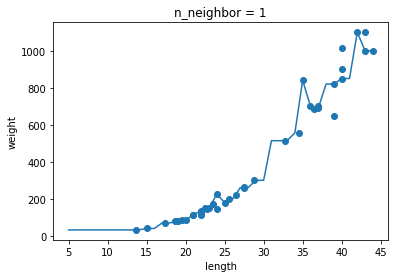

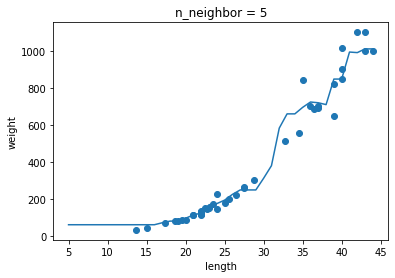

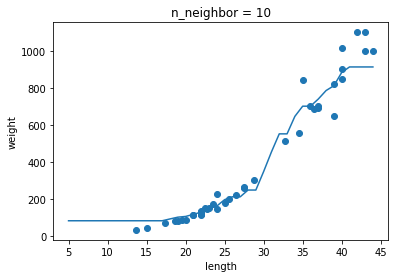

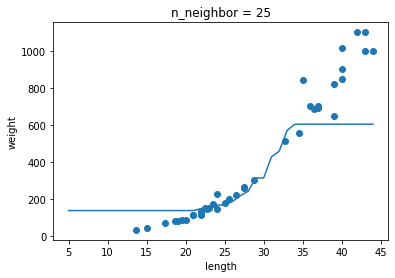

In [72]:
#n=1,5,10 일때 예측결과를 그래프로 그려보자
for n in [1,5,10,25]:
    #모델훈련하기
    knr.n_neighbors= n
    knr.fit(X_train,Y_train)
    #지정한 범위 X에 대한 예측값 구하기
    pred=knr.predict(x)
    #훈련 세트와 예측결과그래프를 그리기
    plt.scatter(X_train,Y_train)
    plt.plot(x,pred)
    plt.title("n_neighbor = {}".format(n))
    plt.xlabel("length")
    plt.ylabel("weight")
    plt.show()